# Facebook Recruiting IV: Human or Robot?

###The goal is to identify online auction bids that are placed by "robots", helping the site owners easily flag these users for removal from their site to prevent unfair auction activity. 

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [73]:
bidder_train = pd.read_csv('train.csv')

##Data fields

###For the bidder dataset

####bidder_id – Unique identifier of a bidder.
####payment_account – Payment account associated with a bidder. These are obfuscated to protect privacy. 
####address – Mailing address of a bidder. These are obfuscated to protect privacy. 
####outcome – Label of a bidder indicating whether or not it is a robot. Value 1.0 indicates a robot, where value 0.0 indicates human. 


In [74]:
bidder_train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0


In [75]:
bidder_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013 entries, 0 to 2012
Data columns (total 4 columns):
bidder_id          2013 non-null object
payment_account    2013 non-null object
address            2013 non-null object
outcome            2013 non-null float64
dtypes: float64(1), object(3)

In [76]:
1 - bidder_train.outcome.mean()

0.94883258817685046

In [77]:
bids = pd.read_csv('bids.csv')

###For the bid dataset

####bid_id - unique id for this bid
####bidder_id – Unique identifier of a bidder (same as the bidder_id used in train.csv and test.csv)
####auction – Unique identifier of an auction
####merchandise –  The category of the auction site campaign, which means the bidder might come to this site by way of searching for "home goods" but ended up bidding for "sporting goods" - and that leads to this field being "home goods". This categorical field could be a search term, or online advertisement. 
####device – Phone model of a visitor
####time - Time that the bid is made (transformed to protect privacy).
####country - The country that the IP belongs to
####ip – IP address of a bidder (obfuscated to protect privacy).
####url - url where the bidder was referred from (obfuscated to protect privacy). 

In [78]:
bids.head(10)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3
5,5,e8291466de91b0eb4e1515143c7f74dexy2yr,3vi4t,mobile,phone7,9759243157894736,ru,91.107.221.27,vasstdc27m7nks3
6,6,eef4c687daf977f64fc1d08675c44444raj3s,kjlzx,mobile,phone2,9759243210526315,th,152.235.155.159,j9nl1xmo6fqhcc6
7,7,ab056855c9ca9d36390feae1fa485883issyg,f5f6k,home goods,phone8,9759243210526315,id,3.210.112.183,hnt6hu93a3z1cpc
8,8,d600dc03b11e7d782e1e4dae091b084a1h5ch,h7jjx,home goods,phone9,9759243210526315,th,103.64.157.225,vasstdc27m7nks3
9,9,a58ace8b671a7531c88814bc86b2a34cf0crb,3zpkj,sporting goods,phone4,9759243210526315,za,123.28.123.226,vasstdc27m7nks3


In [79]:
bids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
bid_id         int64
bidder_id      object
auction        object
merchandise    object
device         object
time           int64
country        object
ip             object
url            object
dtypes: int64(2), object(7)

In [80]:
bidder_train.bidder_id.head()

0    91a3c57b13234af24875c56fb7e2b2f4rb56a
1    624f258b49e77713fc34034560f93fb3hu3jo
2    1c5f4fc669099bfbfac515cd26997bd12ruaj
3    4bee9aba2abda51bf43d639013d6efe12iycd
4    4ab12bc61c82ddd9c2d65e60555808acqgos1
Name: bidder_id, dtype: object

##Merge the bids data set and the bidder data set

In [81]:
train_data = pd.merge(bids, bidder_train, how='left', on='bidder_id')

In [82]:
train_data

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3,NaN,NaN,NaN
1,14,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,wberf,jewelry,phone15,9759243263157894,au,134.243.148.253,vasstdc27m7nks3,NaN,NaN,NaN
2,106,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,hw5at,jewelry,phone80,9759243736842105,ke,227.231.81.211,v2gyrh0dbr31atn,NaN,NaN,NaN
3,152,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,uw3sx,jewelry,phone41,9759243947368421,iq,140.231.164.76,xdsfv4oevw5owkq,NaN,NaN,NaN
4,155,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,q79ya,jewelry,phone102,9759244000000000,za,187.81.242.103,eex5it5avrad6s8,NaN,NaN,NaN
5,169,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,qcppg,jewelry,phone5,9759244052631578,in,13.136.161.106,vasstdc27m7nks3,NaN,NaN,NaN
6,224,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,fqfbw,jewelry,phone4,9759244368421052,in,153.47.226.142,vasstdc27m7nks3,NaN,NaN,NaN
7,366,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,idfc3,jewelry,phone4,9759245052631578,ke,207.97.126.108,vasstdc27m7nks3,NaN,NaN,NaN
8,421,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759245368421052,us,69.166.231.58,vasstdc27m7nks3,NaN,NaN,NaN
9,422,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,2yowp,jewelry,phone46,9759245368421052,iq,140.231.164.76,hsfvg8lforbluvq,NaN,NaN,NaN


In [83]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7656334 entries, 0 to 7656333
Data columns (total 12 columns):
bid_id             int64
bidder_id          object
auction            object
merchandise        object
device             object
time               int64
country            object
ip                 object
url                object
payment_account    object
address            object
outcome            float64
dtypes: float64(1), int64(2), object(9)

##Drop all the rows from the dataset where there is no outcome (Nan)

In [84]:
train_data = train_data[pd.notnull(train_data['outcome'])]

In [85]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3071224 entries, 62529 to 7656333
Data columns (total 12 columns):
bid_id             int64
bidder_id          object
auction            object
merchandise        object
device             object
time               int64
country            object
ip                 object
url                object
payment_account    object
address            object
outcome            float64
dtypes: float64(1), int64(2), object(9)

###String variables are all the columns that have a string entry instead of a number. The must be integers in order to use Cross Validation.

In [86]:
string_variables = ['bidder_id','auction','merchandise','device','country','ip','url','payment_account','address','outcome']

In [87]:
from sklearn import preprocessing

train_numerical = train_data.copy()
encoder_dict = {}

for col in string_variables:
    le = preprocessing.LabelEncoder()
    le.fit(train_data[col])
    encoder_dict[col] = le
    train_numerical[col] = le.transform(train_data[col])

In [88]:
train_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3071224 entries, 62529 to 7656333
Data columns (total 12 columns):
bid_id             int64
bidder_id          int64
auction            int64
merchandise        int64
device             int64
time               int64
country            int64
ip                 int64
url                int64
payment_account    int64
address            int64
outcome            int64
dtypes: int64(12)

###All the data is now represented as integers

In [89]:
train_numerical.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
62529,1,797,3645,4,1,9759243157894736,85,814905,362128,1497,438,0
62530,25,797,1092,4,3090,9759243315789473,16,220732,577284,1497,438,0
62531,39,797,3645,4,2627,9759243368421052,85,922139,336892,1497,438,0
62532,42,797,6953,4,2908,9759243368421052,85,525279,518653,1497,438,0
62533,68,797,6099,4,4459,9759243526315789,85,162298,25971,1497,438,0


###Numerical features are the features that are going to be used to try to predict the outcome. The outcome is the target.

In [90]:
numerical_features = train_numerical.get(['bid_id','bidder_id','auction','merchandise','device','time','country','ip','url','payment_account','address'])

In [91]:
numerical_features.count()

bid_id             3071224
bidder_id          3071224
auction            3071224
merchandise        3071224
device             3071224
time               3071224
country            3071224
ip                 3071224
url                3071224
payment_account    3071224
address            3071224
dtype: int64

In [92]:
features_array = numerical_features.values
features_array

array([[      1,     797,    3645, ...,  362128,    1497,     438],
       [     25,     797,    1092, ...,  577284,    1497,     438],
       [     39,     797,    3645, ...,  336892,    1497,     438],
       ..., 
       [7639758,    1261,    4579, ...,  615590,     744,    1808],
       [7651414,    1732,   12080, ...,  486041,     291,     665],
       [7651994,      15,    3267, ...,  116324,    1833,     791]])

In [93]:
target = train_numerical.outcome.values

In [94]:
from sklearn.cross_validation import train_test_split

features_train, features_test, target_train, target_test = train_test_split(
    features_array, target, test_size=0.20, random_state=0)

In [95]:
features_train.shape

(2456979, 11)

In [96]:
features_test.shape

(614245, 11)

In [97]:
target_train.shape

(2456979,)

In [98]:
target_test.shape

(614245,)

In [99]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1) #no class weight specified
lr.fit(features_train, target_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [100]:
target_predicted = lr.predict(features_test)

In [101]:
from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_predicted)

0.86556667127937548

###This model is not doing very well at predicting the spam in the train dataset. The overall accuracy is 86.6%, but just guessing "not spam" every time would yield better results and it is not catching any spam.

In [102]:
feature_names = numerical_features.columns.values
feature_names

array(['bid_id', 'bidder_id', 'auction', 'merchandise', 'device', 'time',
       'country', 'ip', 'url', 'payment_account', 'address'], dtype=object)

In [103]:
lr.coef_

array([[ -7.39295896e-26,  -2.71041818e-29,  -1.40221212e-28,
         -1.18067071e-31,  -5.67025542e-29,  -1.92097335e-16,
         -2.22655956e-30,  -1.00035373e-26,  -7.07415411e-27,
         -2.81845065e-29,  -1.29448995e-29]])

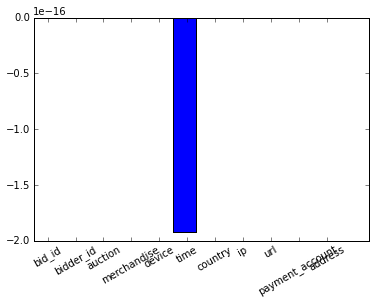

In [104]:
x = np.arange(len(feature_names))
plt.bar(x, lr.coef_.ravel())
_ = plt.xticks(x + 0.5, feature_names, rotation=30)

In [105]:
target_predicted_proba = lr.predict_proba(features_test)
target_predicted_proba[:5]

array([[ 0.86729691,  0.13270309],
       [ 0.86563283,  0.13436717],
       [ 0.86571479,  0.13428521],
       [ 0.86707719,  0.13292281],
       [ 0.86711716,  0.13288284]])

In [106]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(target_test, target_predicted))

[[531670      0]
 [ 82575      0]]


In [107]:
from sklearn.metrics import classification_report

print(classification_report(target_test, target_predicted,
                         target_names=['not spam', 'spam']))

             precision    recall  f1-score   support

   not spam       0.87      1.00      0.93    531670
       spam       0.00      0.00      0.00     82575

avg / total       0.75      0.87      0.80    614245



In [108]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(target_test, target_predicted_proba, this_label):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label= this_label + ', ROC Area = %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('ROC')
    plt.legend(loc="lower right")

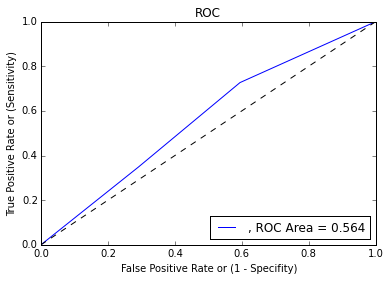

In [109]:
plot_roc_curve(target_test, proba_lr, "")

###Now Logistic Regression will be run with class weight set to 'auto'

In [110]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, class_weight='auto') #class weight specified
lr.fit(features_train, target_train)

LogisticRegression(C=1, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [111]:
target_predicted = lr.predict(features_test)

In [112]:
from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_predicted)

0.1344333287206245

In [114]:
feature_names = numerical_features.columns.values
feature_names

array(['bid_id', 'bidder_id', 'auction', 'merchandise', 'device', 'time',
       'country', 'ip', 'url', 'payment_account', 'address'], dtype=object)

In [115]:
lr.coef_

array([[  7.94291990e-28,  -1.34047426e-30,  -2.95525481e-30,
          7.74848043e-33,  -1.65441117e-30,   1.25291069e-19,
          2.12516329e-32,   3.49949053e-29,   6.08085150e-28,
         -2.17204907e-30,   3.25219467e-30]])

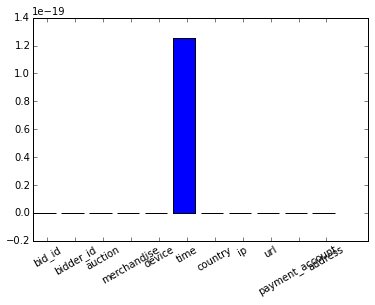

In [116]:
x = np.arange(len(feature_names))
plt.bar(x, lr.coef_.ravel())
_ = plt.xticks(x + 0.5, feature_names, rotation=30)

In [117]:
target_predicted_proba = lr.predict_proba(features_test)
target_predicted_proba[:5]

array([[ 0.4996939 ,  0.5003061 ],
       [ 0.49969624,  0.50030376],
       [ 0.49969613,  0.50030387],
       [ 0.49969421,  0.50030579],
       [ 0.49969415,  0.50030585]])

In [118]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(target_test, target_predicted))

[[     0 531670]
 [     0  82575]]


In [119]:
from sklearn.metrics import classification_report

print(classification_report(target_test, target_predicted,
                         target_names=['not spam', 'spam']))

             precision    recall  f1-score   support

   not spam       0.00      0.00      0.00    531670
       spam       0.13      1.00      0.24     82575

avg / total       0.02      0.13      0.03    614245



In [120]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(target_test, target_predicted_proba, this_label):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label= this_label + ', ROC Area = %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('ROC')
    plt.legend(loc="lower right")

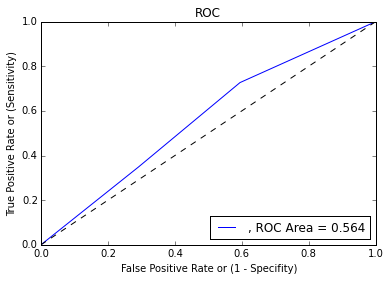

In [121]:
plot_roc_curve(target_test, proba_lr, "")

###This model improved the precision of predicting spam to 13%, however the overall accuracy is only 13% and the precision of predicting "not spam" dramatically decreased to 0.

In [122]:
data_spam = train_numerical[train_numerical.outcome == 1]
data_notspam = train_numerical[train_numerical.outcome == 0]

In [123]:
tmp = [data_spam, data_spam, data_spam, data_notspam]
data_us = pd.concat(tmp)

numerical_features_us = data_us.get(['bid_id','bidder_id','auction','merchandise','device','time','country','ip','url','payment_account','address'])
features_array_us = numerical_features_us.values
target_us = data_us.outcome.values

#train test split
features_train_us, features_test_us, target_train_us, target_test_us = train_test_split(features_array_us, target_us, test_size=0.20, random_state=0)

# train logistic regression, evaluate on test
lr_us = LogisticRegression(C=1)
lr_us.fit(features_train_us, target_train_us)



LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [124]:
target_predicted_us = lr_us.predict(features_test)
    
#evaluate accuracy
print("Train Testing Results With Upsampling the Minority Class \n\n")

print(classification_report(target_test, target_predicted_us,
                         target_names=['not spam', 'spam']))
    

Train Testing Results With Upsampling the Minority Class 


             precision    recall  f1-score   support

   not spam       0.87      1.00      0.93    531670
       spam       0.00      0.00      0.00     82575

avg / total       0.75      0.87      0.80    614245



In [125]:
accuracy_score(target_test, target_predicted_us)

0.86556667127937548

In [126]:
bidder_test = pd.read_csv('test.csv')

In [127]:
bidder_test.head()

,bidder_id,payment_account,address
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa


In [128]:
test_data = pd.merge(bids, bidder_test, how='left', on='bidder_id')

In [129]:
test_data.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c2282ay1v,7f4c6ac489cbd95e38e4f093bb308af5jae25
1,14,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,wberf,jewelry,phone15,9759243263157894,au,134.243.148.253,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c2282ay1v,7f4c6ac489cbd95e38e4f093bb308af5jae25
2,106,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,hw5at,jewelry,phone80,9759243736842105,ke,227.231.81.211,v2gyrh0dbr31atn,a3d2de7675556553a5f08e4c88d2c2282ay1v,7f4c6ac489cbd95e38e4f093bb308af5jae25
3,152,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,uw3sx,jewelry,phone41,9759243947368421,iq,140.231.164.76,xdsfv4oevw5owkq,a3d2de7675556553a5f08e4c88d2c2282ay1v,7f4c6ac489cbd95e38e4f093bb308af5jae25
4,155,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,q79ya,jewelry,phone102,9759244000000000,za,187.81.242.103,eex5it5avrad6s8,a3d2de7675556553a5f08e4c88d2c2282ay1v,7f4c6ac489cbd95e38e4f093bb308af5jae25


In [2]:
fullbid_variables = ['bid_id','bidder_id','auction','merchandise','device','time','country','ip','url','payment_account','address']


fullbid_numerical = test_data.copy()
fullbid_encoder_dict = {}

for col in fullbid_variables:
    le = preprocessing.LabelEncoder()
    le.fit(test_data[col])
    fullbid_encoder_dict[col] = le
    fullbid_numerical[col] = le.transform(test_data[col])

fullbid_numerical.head()

NameError: name 'test_data' is not defined

In [1]:
numerical_features = fullbid_numerical.columns
features_array = numerical_features.values
features_train, features_test, target_train, target_test = train_test_split(features_array, target, test_size=0.20, random_state=0)

NameError: name 'fullbid_numerical' is not defined

In [ ]:
lr.fit(features_train, target_train)
target_predicted = lr.predict(features_test)

In [ ]:
print(bidder_id, target_predicted)

In [ ]:
xcols = [col for col in fullbank_numerical.columns if col not in ['y', 'duration']]

X = fullbid_numerical[xcols].values
y = fullbid_numerical['y'].values

In [ ]:
scores = cross_validation.cross_val_score(clf, X, y, cv=cross_validation.KFold(len(X), n_folds=5,
                           shuffle=True, random_state=0))
scores